In [2]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso,ElasticNet
# from sklearn.linear_model import AdaptiveLasso

pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
target_url = ("D:/Personal/Desktop/Ct_data_1546700.xlsx")
fatigue = pd.read_excel(target_url,encoding="utf-8")
r = [fatigue.min(), fatigue.max(), fatigue.mean(), fatigue.std(),fatigue.quantile()]
r = pd.DataFrame(r, index=['Min', 'Max', 'Mean', 'STD', 'Quantile']).T
np.round(r,2) #保留两位小数
print(r)
corr = np.round(fatigue.corr(method='pearson'),2) #计算相关系数矩阵，保留两位小数
print(corr)
corr.to_csv("corr.csv")

       Min      Max       Mean       STD  Quantile
V   3.0000  25.0000  14.000000  6.380858   14.0000
Ad  1.1700   1.2250   1.197500  0.017264    1.1975
Ct  0.0542   0.9984   0.433568  0.336999    0.3001
       V    Ad    Ct
V   1.00 -0.00 -0.96
Ad -0.00  1.00 -0.01
Ct -0.96 -0.01  1.00


In [27]:
#利用AdaptiveLasso分析变量和特征系数
# model = Lasso(alpha=0.1)
feature = ['V',"Ad"]
fatigue_mean = fatigue.mean()
fatigue_std = fatigue.std()
fatigue = (fatigue - fatigue_mean) / fatigue_std
x_train = fatigue[feature].as_matrix()
y_train = fatigue['Ct']

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [30]:
from keras.models import Sequential
from keras.layers import Dense,Activation
import time
start = time.clock()
model = Sequential()
model.add(Dense(output_dim = 6,input_dim=2))
model.add(Activation('relu'))
model.add(Dense(units=1, input_dim=2))
model.compile(loss='mean_squared_error', optimizer='adam')  # 编译模型
model.fit(x_train, y_train, nb_epoch = 300, batch_size=16) #训练模型，学习一千次
end = time.clock()
usetime = end-start
print ('训练该模型耗时'+ str(usetime) +'s!')
aa ='learn.model'
model.save_weights(aa) # 将该模型存储
x = ((fatigue[feature] - fatigue_mean[feature])/[feature]).as_matrix()
pre = 'Ct_pre'
fatigue[pre] = model.predict(x_train)
fatigue.to_excel('data_pre.xlsx')


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=2, units=6)`
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/300
2652/2652 [==============================] - 1s 381us/step - loss: 75.9904
Epoch 2/300
2652/2652 [==============================] - 0s 115us/step - loss: 24.4669
Epoch 3/300
2652/2652 [==============================] - 1s 239us/step - loss: 8.7682
Epoch 4/300
2652/2652 [==============================] - 1s 195us/step - loss: 3.2560
Epoch 5/300
2652/2652 [==============================] - 0s 152us/step - loss: 1.2178
Epoch 6/300
2652/2652 [==============================] - 0s 165us/step - loss: 0.4897
Epoch 7/300
2652/2652 [==============================] - 1s 190us/step - loss: 0.2415
Epoch 8/300
2652/2652 [==============================] - 1s 243us/step - loss: 0.1472
Epoch 9/300
2652/2652 [==============================] - 1s 243us/step - loss: 0.1017
Epoch 10/300
2652/2652 [==============================] - 1s 291us/step - loss: 0.0755
Epoch 11/300
2652/2652 [==============================] - 0s 173us/step - loss: 0.0598
Epoch 12/300
2652/2652 [==========================

2652/2652 [==============================] - 0s 130us/step - loss: 0.0081
Epoch 181/300
2652/2652 [==============================] - 0s 135us/step - loss: 0.0080
Epoch 182/300
2652/2652 [==============================] - 0s 135us/step - loss: 0.0080
Epoch 183/300
2652/2652 [==============================] - ETA: 0s - loss: 0.008 - 0s 127us/step - loss: 0.0080
Epoch 184/300
2652/2652 [==============================] - 0s 144us/step - loss: 0.0080
Epoch 185/300
2652/2652 [==============================] - 0s 126us/step - loss: 0.0079
Epoch 186/300
2652/2652 [==============================] - 0s 134us/step - loss: 0.0080
Epoch 187/300
2652/2652 [==============================] - 0s 152us/step - loss: 0.0080
Epoch 188/300
2652/2652 [==============================] - 0s 131us/step - loss: 0.0080
Epoch 189/300
2652/2652 [==============================] - 0s 164us/step - loss: 0.0080
Epoch 190/300
2652/2652 [==============================] - 0s 151us/step - loss: 0.0080
Epoch 191/300
2652/265

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()


In [36]:
print((1.17/1.225)**(1/3))
print(5*(1.2/1.225)**(1/3))

0.9848042731052689
4.965752349837786


        4         3         2
-1.297 x + 29.87 x - 148.3 x + 282 x - 106.6


<IPython.core.display.Javascript object>


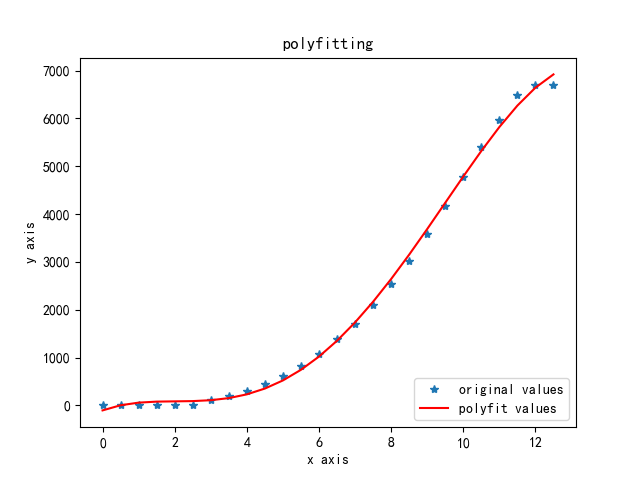

[-1.06641468e+02  9.54347185e-01  5.56936782e+01  7.70615980e+01
  8.25969811e+01  8.78925030e+01  1.06594641e+02  1.50403673e+02
  2.29073680e+02  3.50412543e+02  5.20281944e+02  7.42597369e+02
  1.01932810e+03  1.35049723e+03  1.73418164e+03  2.16651203e+03
  2.64167288e+03  3.15190249e+03  3.68749295e+03  4.23679016e+03
  4.78619381e+03  5.32015741e+03  5.82118825e+03  6.26984744e+03
  6.64474987e+03  6.92256425e+03]


In [2]:
%matplotlib notebook
# TODO:设定图中文与负号正常显示
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
import numpy as np
x_l = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,
       11,11.5,12,12.5]
# y_l = [0,0,0,0,0,0 ,103 ,186 ,295 ,437 ,609 ,818 ,1073 ,1376 ,1700 ,2088 ,2527 ,3011 ,3566 ,4158 ,4756 
#        ,5382 ,5945 ,6471 ,6700 ,6700,6700,6700 ]
y_l = [0,0,0,0,0,0,105 ,188 ,296 ,438 ,612 ,821 ,1078 ,1382 ,1707 ,2097 ,2537 ,3022 ,3579 ,4173 ,4772 ,5398 ,5961 ,6484 ,6700 ,6700 ]
# x_l = [5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5]
# y_l = [612 ,821 ,1078 ,1382 ,1707 ,2097 ,2537 ,3022 ,3579 ,4173 ,4772 ,5398 ,5961 ,6484 ,6700 ,6700 ]
x = np.array(x_l)
y = np.array(y_l)
z1 = np.polyfit(x, y, 4)#用3次多项式拟合
p1 = np.poly1d(z1)
print(p1) #在屏幕上打印拟合多项式
yvals=p1(x)#也可以使用yvals=np.polyval(z1,x)
# y_new = p1(np.array([3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5]))
plot1=plt.plot(x, y, '*',label='original values')
plot2=plt.plot(x, yvals, 'r',label='polyfit values')
# plot3=plt.plot(x, y_new, '-',label='predict values')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend(loc=4)#指定legend的位置,读者可以自己help它的用法
plt.title('polyfitting')
plt.show()
# plt.savefig('p1.png')
print (p1(x_l))

<IPython.core.display.Javascript object>


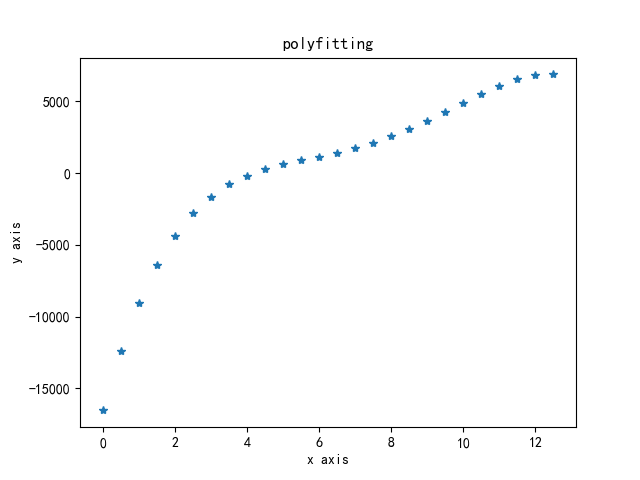

In [89]:
x = np.arange(0,13,0.5)
y = -5.593 * x ** 4 + 173.6 *x  ** 3 - 1882 * x ** 2+ 9196 * x - 1.654e+04
# y = -1.297*x **4 + 29.87*x ** 3 - 148.3*x**2 + 282*x - 106.6
fig = plt.figure
plt.plot(x, y, '*',label='test')
plt.xlabel('x axis')
plt.ylabel('y axis')
# plt.legend(loc=4)#指定legend的位置,读者可以自己help它的用法
plt.title('polyfitting')
plt.show()

25
25
        4         3         2
-0.746 x + 12.57 x + 40.19 x - 537.6 x + 1012


<IPython.core.display.Javascript object>


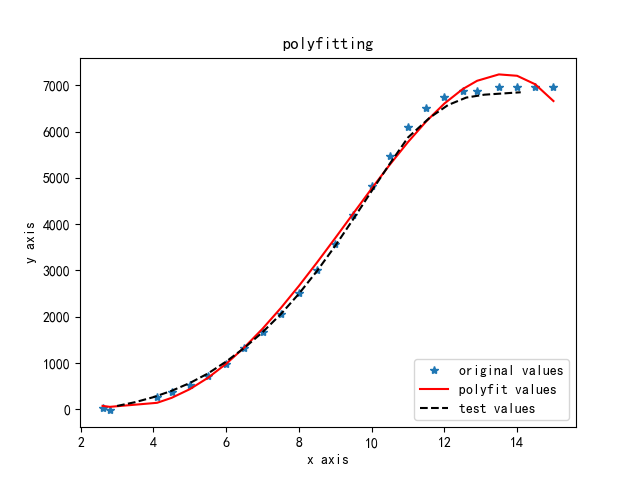

[ -31.66699377 -103.76399126 -143.26718636 -152.13891614 -132.46044363
  -93.43195786  -48.3725738    10.27966763   74.9677995   132.01592894
  169.62923711  183.8939792   168.77748445  121.1281561    52.67547145
  -20.97001817  -98.31668741   -0.49225924  100.95493046  232.9549592
  365.29996328  417.66315302  332.59881279]


In [8]:
v = [2.6,2.8,4.1,4.5,5.0,5.5,6.0,6.5,7.0,
     7.5,8.0,8.5,9.0,9.5,10.0,10.5,11.0,11.5,12,12.5,12.9,13.5,14.0,14.5,15]
power = [18.9,-24.5,262.7,366.4,524.5,725.7,979.6,
         1315.7,1659.2,2065.8,2509.6,3011.6,3562.9,4196.4,4833.9,5475.0,
         6096.2,6503.0,6750.7,6881.3,6868.8,6958.0,6962.3,6969.3,6970.8]
v_simu = [3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.6,12.1,12.6,13.1,13.6,14.1]
power_simu = [72,154,262,399,567,774,1031,1327,1665,2053,2496,2990,3532,4115,
              4716,5307,5873,6303,6574,6735,6798,6824,6850]
simu = np.array(power_simu)
print(len(v))
print(len(power))
x = np.array(v)
y = np.array(power)
z1 = np.polyfit(x, y, 4)#用3次多项式拟合
p1 = np.poly1d(z1)
print(p1) #在屏幕上打印拟合多项式
yvals=p1(x)#也可以使用yvals=np.polyval(z1,x)
# y_new = p1(np.array([3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5]))
plot1=plt.plot(x, y, '*',label='original values')
plot2=plt.plot(x, yvals, 'r',label='polyfit values')
plot3 = plt.plot(v_simu,power_simu,'k--', label = 'test values')
# plot3=plt.plot(x, y_new, '-',label='predict values')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend(loc=4)#指定legend的位置,读者可以自己help它的用法
plt.title('polyfitting')
plt.show()
# plt.savefig('p1.png')
actual = np.array(p1(v_simu))
print (actual - simu)